#### Notes:
    1. Check than Kalman Filter works fine in general mode.
    2. Check that Kalman FIlter solve CPs task fine for syth data.

# Import libs

In [3]:
import sys
sys.path.append("../..")

In [4]:
from models.ProbabilityBased import KalmanFilter
from data.SythData import LinearSteps, SinusoidWaves

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Generate Data

In [6]:
# data = LinearSteps(length_data=1000, cps_number=5, white_noise_level="default").get()
data = SinusoidWaves(length_data=1000, cps_number=4, white_noise_level="min").get()

<Axes: xlabel='time'>

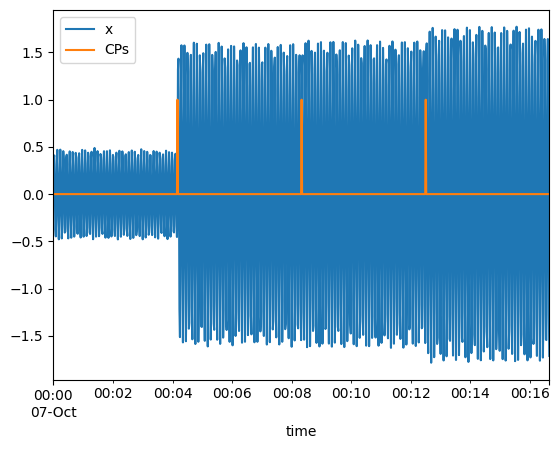

In [7]:
data.plot()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 1999-10-07 00:00:00 to 1999-10-07 00:16:39
Freq: S
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   CPs     1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.4 KB


# Init Model

In [9]:
model = KalmanFilter(is_cps_filter_on=True,
                     is_cumsum_applied=True,
                     queue_window=10,
                     is_z_normalization=True,
                     is_squared_residual=True,
                     threshold_std_coeff=3.65).fit(list(data.x), None)

In [10]:
cps_pred = model.predict(data['x'].values)

# Plot Results

In [11]:
data['cps_pred'] = cps_pred

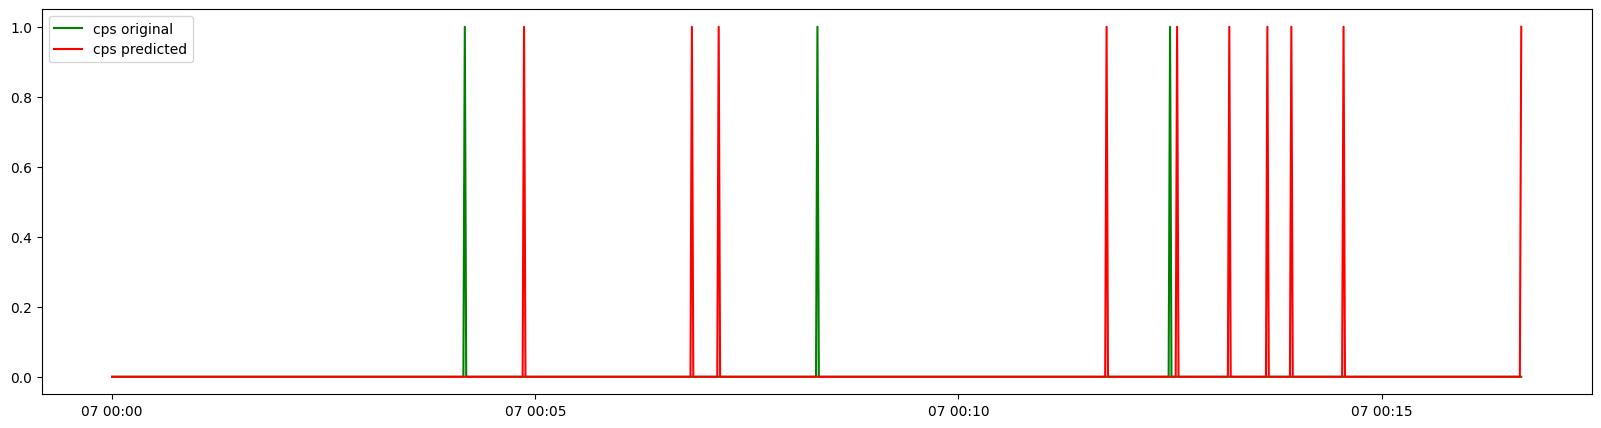

In [12]:
plt.figure(figsize=(20,5))
plt.plot(data["CPs"], label='cps original', color='green')
plt.plot(data['cps_pred'], label='cps predicted', color='red')
plt.legend()

In [24]:
cps_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Plot Forecasted time series

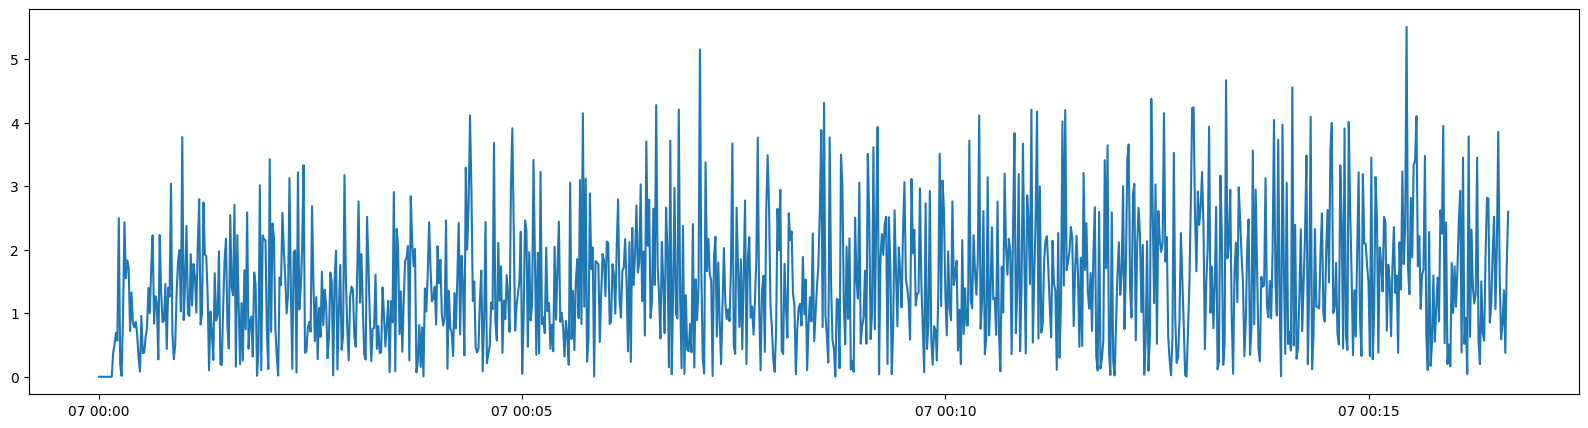

In [25]:
plt.figure(figsize=(20,5))
plt.plot(abs(model.get_distances(data.x)))

## Plot Original Time-Series

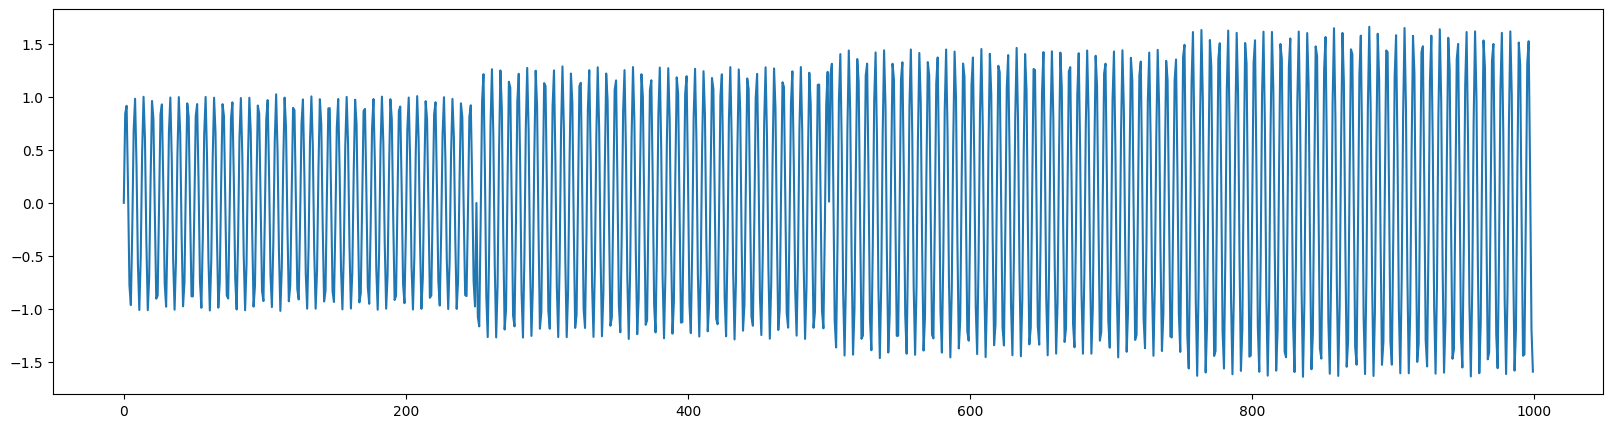

In [26]:
plt.figure(figsize=(20,5))
plt.plot(data['x'].values)

# Residuals

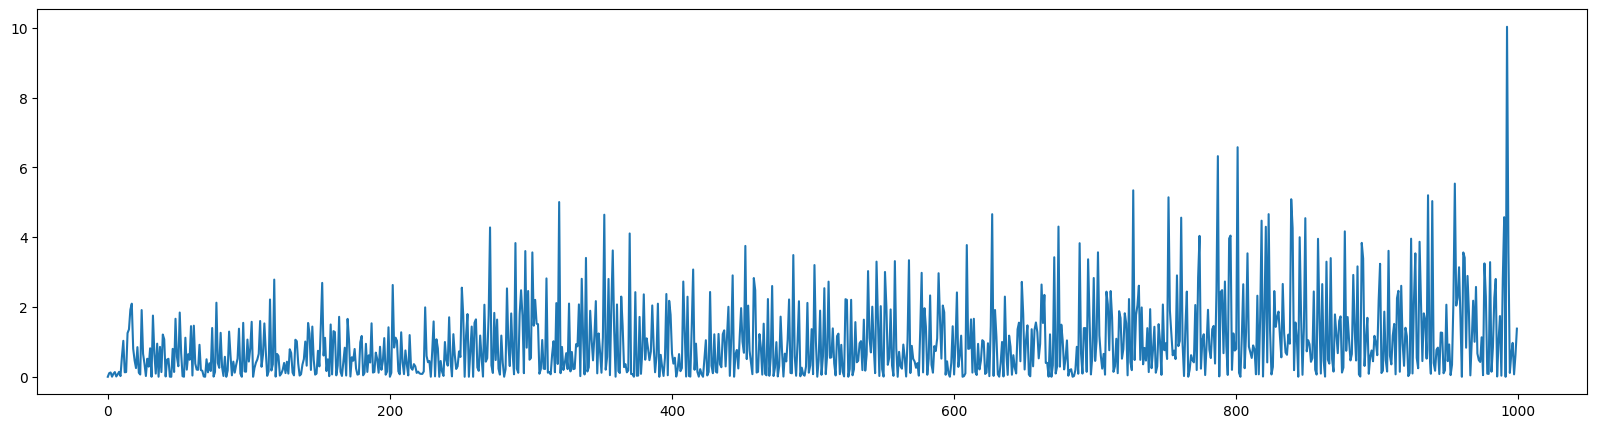

In [28]:
plt.figure(figsize=(20,5))
plt.plot(abs(model.z_normalization(data['x'].values - model.get_distances(data['x'].values)))**2)